# Using legendgram as a map legend

With mapclassify, you can replace standard legend with one composed of a histogram of the values showed in the colors you can see in the map.

In [1]:
import geopandas as gpd
from libpysal import examples

import mapclassify

In [2]:
gdf = gpd.read_file(examples.get_path("NAT.shp")).to_crs(epsg=5070)
gdf.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lake of the Woods,Minnesota,27,077,27077,27,77,27077,0,0.000000,...,0.024534,0.285235,0.372336,0.342104,0.336455,11.279621,5.4,5.663881,9.515860,"POLYGON ((49050.745 2838555.999, 49054.346 285..."
1,Ferry,Washington,53,019,53019,53,19,53019,0,0.000000,...,0.317712,0.256158,0.360665,0.361928,0.360640,10.053476,2.6,10.079576,11.397059,"POLYGON ((-1704187.741 2978490.561, -1690089.6..."
2,Stevens,Washington,53,065,53065,53,65,53065,0,1.863863,...,0.210030,0.283999,0.394083,0.357566,0.369942,9.258437,5.6,6.812127,10.352015,"POLYGON ((-1598348.829 2964085.947, -1605943.0..."
3,Okanogan,Washington,53,047,53047,53,47,53047,0,2.612330,...,0.155922,0.258540,0.371218,0.381240,0.394519,9.039900,8.1,10.084926,12.840340,"POLYGON ((-1713271.344 2979541.451, -1712880.7..."
4,Pend Oreille,Washington,53,051,53051,53,51,53051,0,0.000000,...,0.134605,0.243263,0.365614,0.358706,0.387848,8.243930,4.1,7.557643,10.313002,"POLYGON ((-1574802.183 3066600.159, -1545432.6..."


### Using legendgrams with plots can be simple:

<AxesHostAxes: >

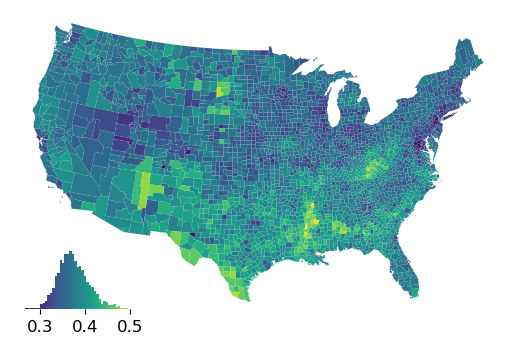

In [3]:
ax = gdf.plot("GI89")
ax.axis("off")
classifier = mapclassify.EqualInterval(gdf["GI89"], k=100)
classifier.plot_legendgram(ax=ax)

### but you can also tweak quite a bit, like the size & location:

We'll make the legend a little longer & shorter, as well as moving it to the lower right:

<AxesHostAxes: >

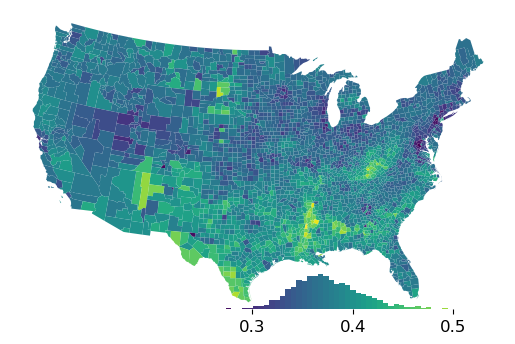

In [4]:
ax = gdf.plot("GI89")
ax.axis("off")
classifier = mapclassify.EqualInterval(gdf["GI89"], k=100)
classifier.plot_legendgram(ax=ax, legend_size=("60%", "12%"), loc="lower right")

We can clip the display to a smaller range to cut off any dangling long tails and use different scheme:

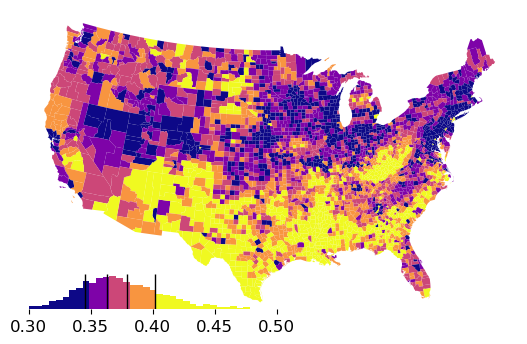

In [5]:
ax = gdf.plot("GI89", cmap="plasma", scheme="Quantiles")
ax.axis("off")
classifier = mapclassify.Quantiles(gdf["GI89"])
hax = classifier.plot_legendgram(
    ax=ax, legend_size=("50%", "12%"), loc="lower left", cmap="plasma", clip=(0.3, 0.5), vlines=True
)

In [6]:
ret = hax.hist(classifier.y, bins=50, color="0.1")

In [7]:
ret[2]

<BarContainer object of 50 artists>

In [8]:
hax.get_ylim()

(np.float64(0.0), np.float64(237.0375))

Further, you can work directly on the Axes, if you prefer very fine-grained control over the plot parameters. `legendgram` returns the Axes on which the legendgram was plotted, so you can modify it after the fact:

In [9]:
riverside = gpd.GeoDataFrame(gdf.iloc[2255].to_frame().T)

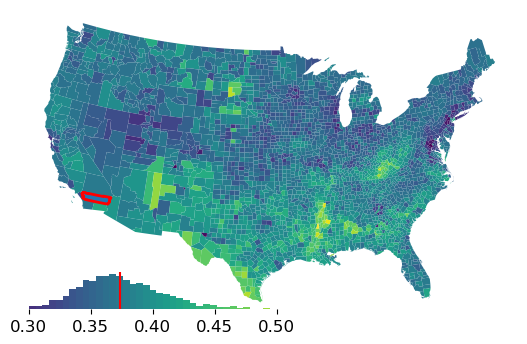

In [10]:
ax = gdf.plot("GI89")  # full map
riverside.plot("GI89", linewidth=2, edgecolor="r", ax=ax)  # riverside in red
ax.axis("off")
classifier = mapclassify.EqualInterval(gdf["GI89"], k=100)
hax = classifier.plot_legendgram(
    ax=ax, legend_size=("50%", "12%"), loc="lower left", clip=(0.3, 0.5)
)
hax.vlines(
    gdf.iloc[2255].GI89, 0, 1, color="r", transform=hax.transAxes
)  # mark Riverside's Gini in the legend